In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func


import datetime as dt
from pandas.plotting import table

In [3]:
#create engine using the 'hawaii sqlite DB
engine = create_engine("sqlite:///hawaii.sqlite")


In [4]:
#declare a base using the Automap_base 
Base = automap_base()

In [5]:
#use base class to reflect the databases tables
Base.prepare(engine, reflect=True)

In [6]:
#show all of classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
#Assign the both measurement and station classes to a variable with their names
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
session = Session(engine)

# Querying the data with sql alchemy 

In [9]:
#set query to variable that will be used to create data frame
prev_year = dt.date.today() - dt.timedelta(days=365)
dt_prcp=session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= prev_year).all()

In [10]:
#create data frame off of sql query from previous line
dt_prcp_df = pd.DataFrame(dt_prcp)

In [11]:
#set index on the date column
dt_prcp_df.set_index('date')
dt_prcp_df.head()

,date,prcp
0,2017-01-25,0.03
1,2017-01-26,0.00
2,2017-01-27,0.00
3,2017-01-28,0.00
4,2017-01-29,0.18


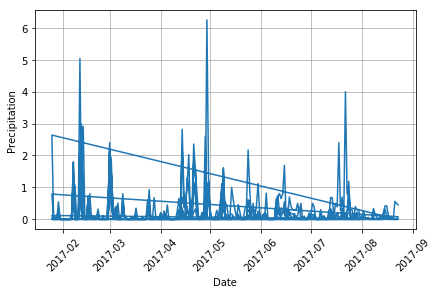

In [12]:
#create plot of precipation data over time 
plt.plot(dt_prcp_df['date'],dt_prcp_df['prcp'])
plt.grid(True)
plt.xticks(rotation='45')
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.show()


In [13]:
#set query to variable that will be used to create data frame
dt_=session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date > '2017-01-20').all()

# Station Analysis using queries  

In [14]:
#counting the number of stations in the station table
count_of_stations=session.query(func.count(Station.name)).all()

print("There's a total of {} station's on the island".format(count_of_stations))

There's a total of [(9,)] station's on the island


In [15]:
#find the station with the most recordings. This is the second column of the output borken by a comma
most_active_station = session.query(Station.name, Measurement.station, func.count(Measurement.station)).\
filter(Station.station == Measurement.station ).\
group_by(Station.name).\
order_by(func.count(Measurement.station).desc()).all()
most_active_station

[('WAIHEE 837.5, HI US', 'USC00519281', 2772),
 ('WAIKIKI 717.2, HI US', 'USC00519397', 2724),
 ('KANEOHE 838.1, HI US', 'USC00513117', 2709),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523', 2669),
 ('MANOA LYON ARBO 785.2, HI US', 'USC00516128', 2612),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830', 2202),
 ('HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918', 1979),
 ('PEARL CITY, HI US', 'USC00517948', 1372),
 ('UPPER WAHIAWA 874.3, HI US', 'USC00518838', 511)]

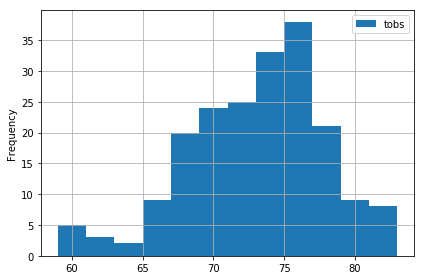

In [17]:
#we know that waihee had the most recordings so we set a where statement on that locations 
prev_year = dt.date.today() - dt.timedelta(days=365)

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()
plt.grid()
plt.show()

In [18]:
#made a function that takes two string dates in the format of 'YYYY-MM-DD' one for start and end to
#find the avg, max, and min

def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62, 69.57142857142857, 74)]


In [20]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
import datetime as dt
prev_year_start = dt.date(2018, 1, 1) - dt.timedelta(days=365)
prev_year_end = dt.date(2018, 1, 7) - dt.timedelta(days=365)

tmin, tavg, tmax = calc_temps(prev_year_start.strftime("%Y-%m-%d"), prev_year_end.strftime("%Y-%m-%d"))[0]
print(tmin, tavg, tmax)


62 68.36585365853658 74


In [40]:
#using the avg temperature for the y value
#using the max and min for the peak to peark values for the y error bar
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
yerr = tmax-tmin
bar = ax.bar(xpos, tmax, yerr=yerr, alpha=0.5, color='green', align="center")
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Avg Temp", ylabel="Temp (F)")
ax.margins(.2, .2)

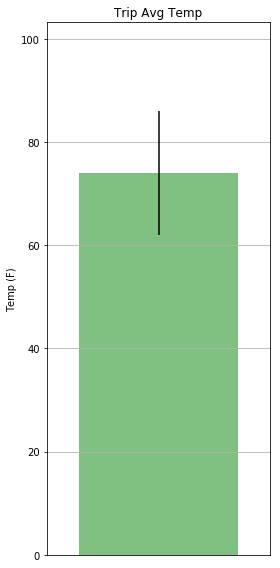

In [41]:
plt.tight_layout()
plt.grid(True)
plt.show(fig)